# Building and training machine learning models in Python

In [16]:
!pip install torch torchviz tensorflow torchmetrics

## Data import and preprocessing
We will use the Palmer Penguins dataset. The task will be to classify three different species of penguins given their body dimensions.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Load the Palmer Penguins dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

In [19]:
penguins.dropna(inplace=True)

In [20]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [21]:
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
labels = pd.get_dummies(penguins['species'])

In [22]:
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [24]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

# Tensorflow & Keras

### Sequential APIs

In [25]:
# Install TensorFlow (uncomment the line below if not already installed)


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    # Dense layers are fully connected layers
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/home/gigitarasi/Desktop/VSC_WORKSPACE/vEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7144 - loss: 0.6650 - val_accuracy: 0.8333 - val_loss: 0.6134
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7956 - loss: 0.6055 - val_accuracy: 0.8333 - val_loss: 0.5598
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8190 - loss: 0.5571 - val_accuracy: 0.8333 - val_loss: 0.5051
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7964 - loss: 0.5082 - val_accuracy: 0.8333 - val_loss: 0.4503
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7858 - loss: 0.4606 - val_accuracy: 0.8333 - val_loss: 0.3957
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8019 - loss: 0.4071 - val_accuracy: 0.8333 - val_loss: 0.3439
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8290 - loss: 0.3543 - val_accuracy: 0.8333 - val_loss: 0.2978
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8165 - loss: 0.3245 - val_accuracy: 0.8333 - val_loss:

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0122
Test accuracy: 1.0


### Functional APIs

In [28]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense


# Define a simple model with Functional API
input_layer = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(input_layer)
x1 = Dense(32, activation='relu')(x)
x2 = Dense(32, activation='relu')(x)
output_layer = Dense(output_dim, activation='softmax')(x1+x2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │        320 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │      2,080 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32)        │          0 │ dense_14[0][0],   │
│                     │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 3)         │         99 │ add_1[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,579 (17.89 KB)

 Trainable params: 4,579 (17.89 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.2205 - loss: 0.7495 - val_accuracy: 0.1667 - val_loss: 0.6666
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3324 - loss: 0.6249 - val_accuracy: 0.7037 - val_loss: 0.5556
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8023 - loss: 0.5311 - val_accuracy: 0.9815 - val_loss: 0.4662
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9750 - loss: 0.4526 - val_accuracy: 0.9815 - val_loss: 0.3923
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9739 - loss: 0.3847 - val_accuracy: 1.0000 - val_loss: 0.3301
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9660 - loss: 0.3306 - val_accuracy: 0.9815 - val_loss: 0.2778
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9634 - loss: 0.2724 - val_accuracy: 0.9630 - val_loss: 0.2343
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9693 - loss: 0.2258 - val_accuracy: 0.9630 - val_loss: 0.

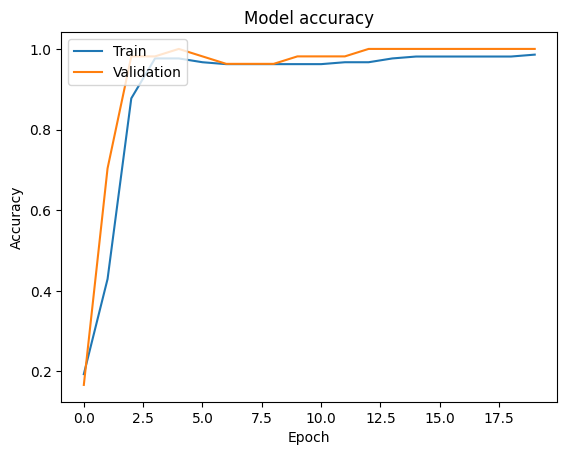

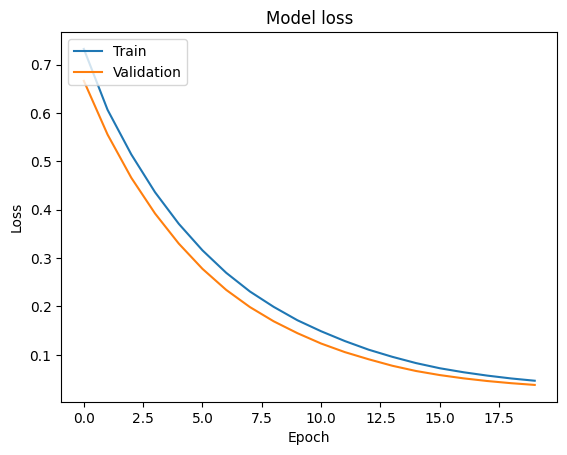

In [29]:
# prompt: plot learning curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# PyTorch

In [30]:
!pip install torch # check your device GPU drivers and install the right version following https://pytorch.org/get-started/locally/

In [31]:
import torch

## Basic tensor operations

Tensors can be declared in many ways

In [32]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.zeros((2, 2))
d = torch.ones((2, 2))
e = torch.rand((2, 2))

Can be converted directly form numpy arrays

In [33]:
ds = torch.from_numpy(X_train.values)

In [34]:
ds.shape

torch.Size([266, 4])

Slicing is supported just like numpy

In [35]:
ds[1,:2]

tensor([-1.2257,  0.3230], dtype=torch.float64)

Lot of operations and operators are defined in the library (likely all the ones that you need)

In [36]:
ds.device

device(type='cpu')

In [37]:
ds.to('cuda')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Autograd & Computational Graph
PyTorch's automatic differentiation engine that powers neural network training. It allows you to compute gradients automatically, which is essential for optimizing model parameters using gradient-based methods like stochastic gradient descent (SGD).

In [ ]:
# When you create a tensor with `requires_grad=True`, PyTorch starts tracking all operations performed on it. This is necessary for computing gradients later.
x = torch.randn(3, requires_grad=True)

# Perform some operations
y = x * 2
z = y.mean()+y.max()

# The `backward()` method computes the gradient of the output (`z` in this case) with respect to all tensors that have `requires_grad=True`.

z.backward()

# The `grad` attribute of a tensor stores the computed gradient. In this example, `x.grad` will contain the gradient of `z` with respect to `x`.
print(z.shape, x.grad)


torch.Size([]) tensor([2.6667, 0.6667, 0.6667])


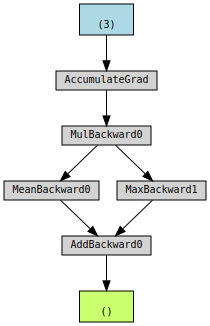

In [ ]:
from torchviz import make_dot
make_dot(z)

## Sequential APIs

In [ ]:
# Install PyTorch (uncomment the line below if not already installed)

import torch.nn as nn

# Define a simple model
model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=10, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=1, bias=True)
  (3): Sigmoid()
)


## Building complex architectures: nn.Module

In [ ]:
# prompt: create a neural network for the penguins task extending nn.Module

class PenguinClassifier(nn.Module):
  def __init__(self, config):
    super(PenguinClassifier, self).__init__()
    self.layers = nn.ModuleList()

    self.layers.append(nn.Linear(config['input_dim'], config['hidden_dim']))

    for i in range(config['hidden_layers']):
      self.layers.append(nn.Linear(config['hidden_dim'], config['hidden_dim']))

    self.layers.append(nn.Linear(config['hidden_dim'], config['output_dim']))
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    for layer in self.layers[:-1]:
      x = self.relu(layer(x))
    x = self.softmax(self.layers[-1](x))
    return x


config = {
    "input_dim": input_dim,
    "hidden_dim": 64,
    "hidden_layers": 1,
    "output_dim": output_dim
}



## Dataloaders and Datasets
Are useful to handle batches loading

In [ ]:
from torch.utils.data import Dataset, DataLoader

class PenguinDataLoader(DataLoader):
  def __init__(self, dataset, batch_size, shuffle=True):
    super(PenguinDataLoader, self).__init__(dataset, batch_size=batch_size, shuffle=shuffle)

class PenguinDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X.values, dtype=torch.float32)
    self.y = torch.tensor(y.values, dtype=torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]



## Training Neural Networks

Autograd is crucial for training neural networks in PyTorch. Here's
how it works in a typical training loop:

1. **Forward Pass:** The input data is fed through the network,
and the output is computed.

2. **Compute Loss:** The loss function is calculated based on
the network's output and the target labels.

3. **Backward Pass:** `loss.backward()` is called to compute the gradient of the loss with respect to all model parameters (weights and biases) that have `requires_grad=True`.
4. **Update Parameters:** An optimizer (like SGD) is used to update the model parameters based on the computed gradients.

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics.functional import accuracy, specificity, auroc, recall, precision, f1_score, matthews_corrcoef

In [ ]:
import torch.optim as optim

# Instantiate the model
model = PenguinClassifier(config)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Create datasets and data loaders
train_dataset = PenguinDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
    # Zero the gradients
    # optimizer.zero_grad()

    # Forward pass
    output = model(data)
    # Calculate loss
    loss = criterion(output, target)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    acc = accuracy(output, target, task='multiclass', num_classes=3)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}')


Epoch [1/20], Step [1/5], Loss: 1.1065, Accuracy: 0.0000
Epoch [1/20], Step [2/5], Loss: 0.8831, Accuracy: 0.0000
Epoch [1/20], Step [3/5], Loss: 0.7246, Accuracy: 0.1302
Epoch [1/20], Step [4/5], Loss: 0.7721, Accuracy: 0.1875
Epoch [1/20], Step [5/5], Loss: 0.7514, Accuracy: 0.5000
Epoch [2/20], Step [1/5], Loss: 0.6442, Accuracy: 0.9115
Epoch [2/20], Step [2/5], Loss: 0.7688, Accuracy: 0.8281
Epoch [2/20], Step [3/5], Loss: 0.7546, Accuracy: 0.8490
Epoch [2/20], Step [4/5], Loss: 0.7702, Accuracy: 0.8333
Epoch [2/20], Step [5/5], Loss: 0.8514, Accuracy: 0.8000
Epoch [3/20], Step [1/5], Loss: 0.7233, Accuracy: 0.8802
Epoch [3/20], Step [2/5], Loss: 0.7389, Accuracy: 0.8646
Epoch [3/20], Step [3/5], Loss: 0.7702, Accuracy: 0.8385
Epoch [3/20], Step [4/5], Loss: 0.7077, Accuracy: 0.8906
Epoch [3/20], Step [5/5], Loss: 0.8514, Accuracy: 0.8000
Epoch [4/20], Step [1/5], Loss: 0.7546, Accuracy: 0.8490
Epoch [4/20], Step [2/5], Loss: 0.7225, Accuracy: 0.8698
Epoch [4/20], Step [3/5], Loss:

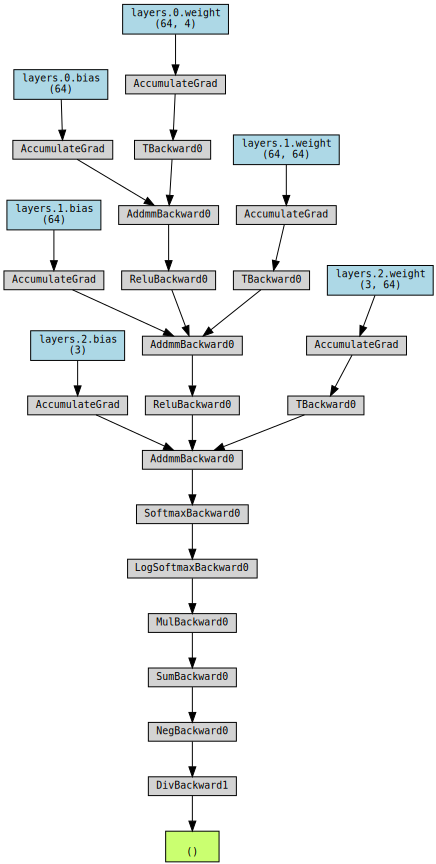

In [ ]:
make_dot(loss, params=dict(model.named_parameters()))